# CitiBike Neighborhood Predictor - XGBoost Model

In this notebook we connect our data to test and run our prediction model using XGBoost method. XGBoost is a highly optimized Gradient Boosted Decision Tree Algorithim. 


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from citibike_scripts import show_cf, plot_feature_importances
%matplotlib inline

In [46]:
df = pd.read_csv('citibike_data/citibike_2018.csv')

In [48]:
df_small = df.sample(500000)

Split variables from targets: 

In [49]:
labels = df_small.stop_nhbr
labels_removed_df = df_small.drop('stop_nhbr', axis=1)

Split data into training and testing sets.  Maintain at least some of each target class in both sets with the 'stratify' argument. 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(labels_removed_df, labels)

Fit xgboost model: 

In [54]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=2, min_child_weight=4, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [55]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=2, min_child_weight=4, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [56]:
training_preds = clf.predict(X_train)

Check for accuracy

In [57]:
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 10.83%
Validation accuracy: 9.767%


Plot a Confusion Matrix

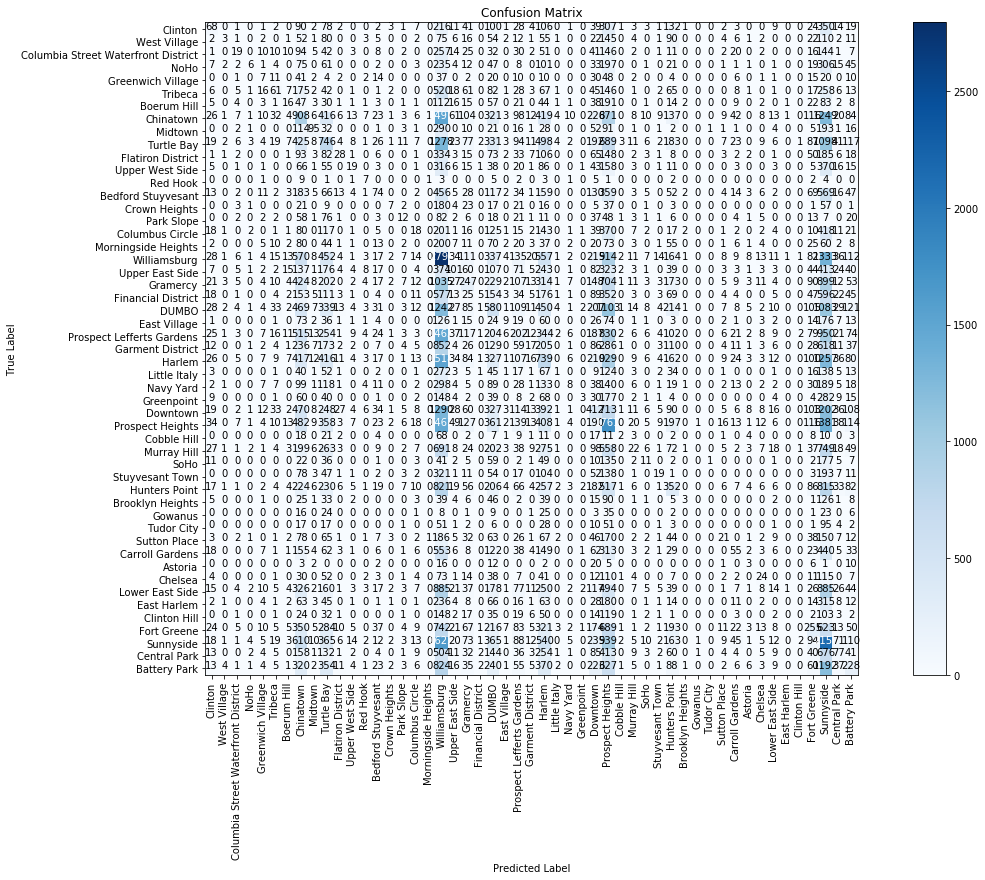

In [58]:
show_cf(y_test, val_preds)

### Use GridSearch to iterate over Hyperparameters to find the most accurate tuning. 

In [ ]:
param_grid = {
    "learning_rate": [0.5, 0.7, 0.1],
    'max_depth': [2, 3, 4],
    'min_child_weight': [4, 5],
    'n_estimators': [300, 400, 500],
}

In [ ]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
eval_metric = ["auc", 'error']
eval_set = [(X_train, y_train), (X_test, y_test)]
grid_clf.fit(X_train, y_train, eval_set= eval_set, early_stopping_rounds=5)
best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

### View Feature importance

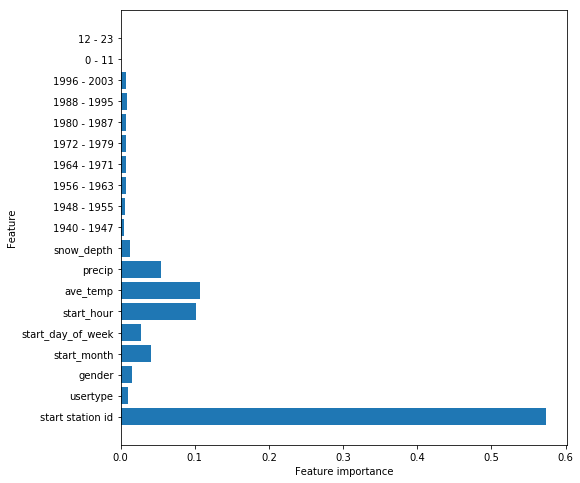

In [59]:
plot_feature_importances(clf)